In [37]:
# importing necessary libraries
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
warnings.filterwarnings("ignore")

In [38]:
#  opening dataset and printing its content
fname = "2000monthly-meant.nc"
ds = xr.open_dataset(fname)
ds

<xarray.Dataset>
Dimensions:    (longitude: 144, latitude: 73, level: 9, time: 12)
Coordinates:
  * longitude  (longitude) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * latitude   (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * level      (level) int32 1 10 100 200 300 500 700 850 1000
  * time       (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2000-12-01
Data variables:
    t          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-05-02 21:24:59 GMT by grib_to_netcdf-2.21.0: grib_to_n...

In [39]:
# Examining variable
ds.t

<xarray.DataArray 't' (time: 12, level: 9, latitude: 73, longitude: 144)>
[1135296 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * latitude   (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * level      (level) int32 1 10 100 200 300 500 700 850 1000
  * time       (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2000-12-01
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature

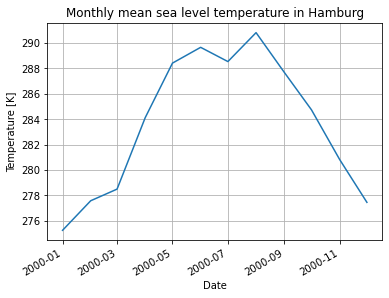

In [40]:
# Plotting sea level temperature in Hamburg time-series
tham=ds.t.sel(level=1000.0, latitude="53.55",longitude=10.0, method="nearest")

tham.plot()
plt.grid()
plt.xlabel('Date')
plt.title('Monthly mean sea level temperature in Hamburg')
plt.show()

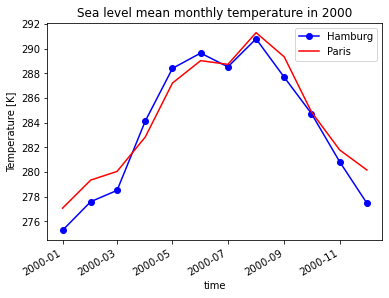

In [41]:
# Comparing mean temperatures in Hamburg and Paris

tham=ds.t.sel(level=1000.0, latitude="53.55",longitude=10.0, method="nearest")
tpar=ds.t.sel(level=1000.0, latitude="48.86",longitude=2.35, method="nearest")

tham.plot(color='blue', marker='o', label="Hamburg")
tpar.plot(color='red',label="Paris")
plt.legend()
plt.title('Sea level mean monthly temperature in 2000')
plt.show()

In [42]:
#  opening dataset and printing its content
ds1=xr.open_dataset("2000monthly-surft-prec.nc")
ds1

<xarray.Dataset>
Dimensions:    (longitude: 144, latitude: 73, time: 12)
Coordinates:
  * longitude  (longitude) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * latitude   (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * time       (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2000-12-01
Data variables:
    lsp        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-05-02 21:46:23 GMT by grib_to_netcdf-2.21.0: grib_to_n...

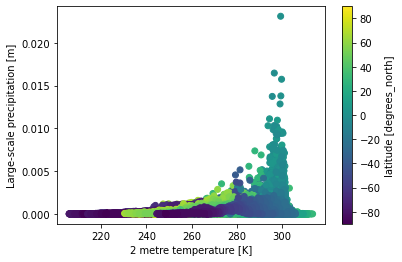

In [43]:
# scatter plot
ds1.plot.scatter(x="t2m",y="lsp", hue="latitude", cmap='viridis')
plt.show()

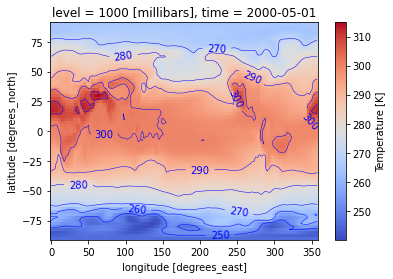

In [44]:
# Plotting 2D data using colormesh.
# Suppose we want to plot mean sea level temperatures in May 2000 across the globe. 
# Then we need to select global sea level data for May and call xarray.plot().
import datetime
date1 = datetime.datetime(year=2000, day=1, month=5)

tsea = ds.t.sel(level=1000.0, time=date1, method="nearest")
tsea.plot(add_colorbar=True, cmap="coolwarm")

# add contours to our plot
ax1=tsea.plot.contour(levels=10, colors="blue", linewidths=0.5, linestyles='solid')

plt.clabel(ax1, inline=1, fontsize=10)
plt.show()

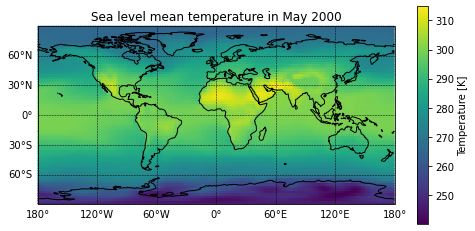

In [45]:
# Plotting data on the map
# using PlateCarree projection
date1 = datetime.datetime(year=2000,day=1,month=5)
tsea=ds.t.sel(level=1000.0, time=date1, method="nearest")


fig1=plt.figure(figsize=(8,4.0))

ax=plt.gca(projection=ccrs.PlateCarree())
tsea.plot(ax=ax,transform=ccrs.PlateCarree())

ax.coastlines()
gl=ax.gridlines(draw_labels=True,linewidth=0.5, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
plt.title('Sea level mean temperature in May 2000')
#remove labels on top and right so that they don’t clash with other elements
plt.show()

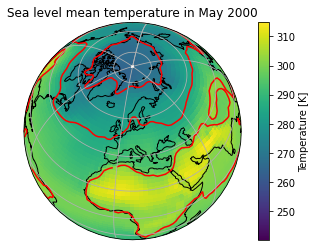

In [46]:
# plot using orthographic projection centered on Hamburg.
fig1=plt.figure()
# use longitude and latitude of Hamburg to center on Hamburg
ax=plt.gca(projection=ccrs.Orthographic(10.0,53.55))
tsea.plot(ax=ax,transform=ccrs.PlateCarree())

ax.coastlines()
ax.gridlines() #labels are not supported yet
tsea.plot.contour(ax=ax, colors='red', transform=ccrs.PlateCarree())
plt.title('Sea level mean temperature in May 2000')
plt.show()

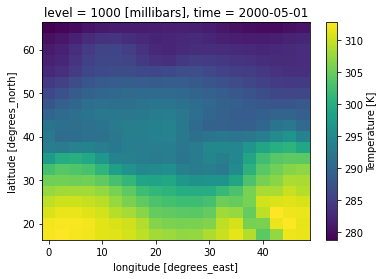

In [47]:
# Limited area plotting 
date1 = datetime.datetime(year=2000,day=1,month=5)
tsea=ds.t.sel(level=1000.0, time=date1, method="nearest")

# select subset of data containing Europe and North Africa
tl=tsea.isel(latitude=slice(10,30),longitude=slice(0,20))
tl.plot()
plt.show()

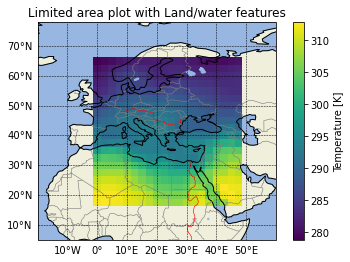

In [48]:
# Limited area plot on a larger map with lakes, rivers and so on.
date1 = datetime.datetime(year=2000,day=1,month=5)
tsea=ds.t.sel(level=1000.0, time=date1, method="nearest")

ax=plt.gca(projection=ccrs.PlateCarree())
ax.set_extent([-20, 60, 5, 75])
# select subset of data containing Europe and North Africa
tl=tsea.isel(latitude=slice(10,30),longitude=slice(0,20))
tl.plot(ax=ax,transform=ccrs.PlateCarree())

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.6, edgecolor='gray')
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS, linewidth=0.6, edgecolor='red')
gl=ax.gridlines(draw_labels=True, linewidth=0.5, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
plt.title('Limited area plot with Land/water features')
plt.show()


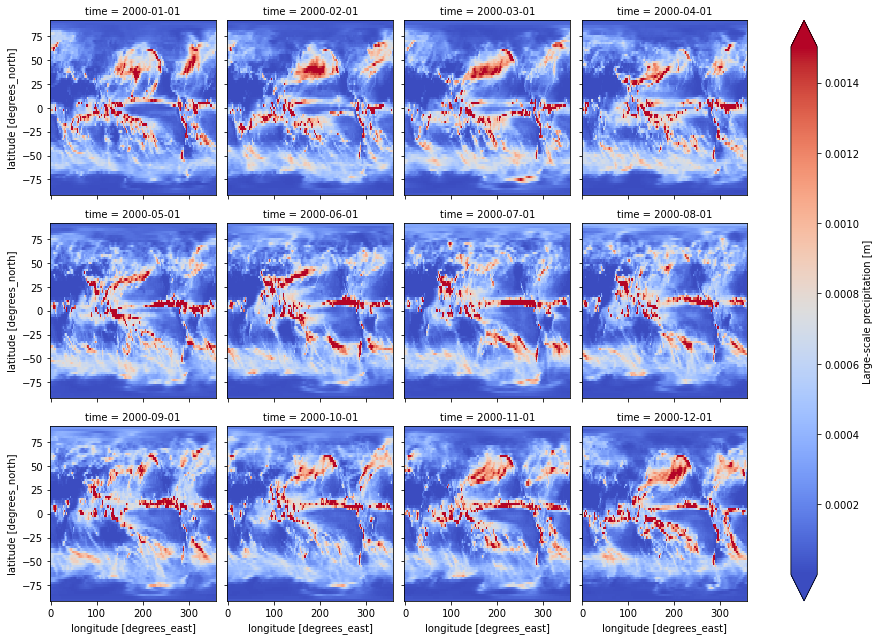

In [34]:
# Faceting

q=ds1.lsp
q.plot(x="longitude",y="latitude", col="time", col_wrap=4, cmap = "coolwarm", robust=True)

plt.show()

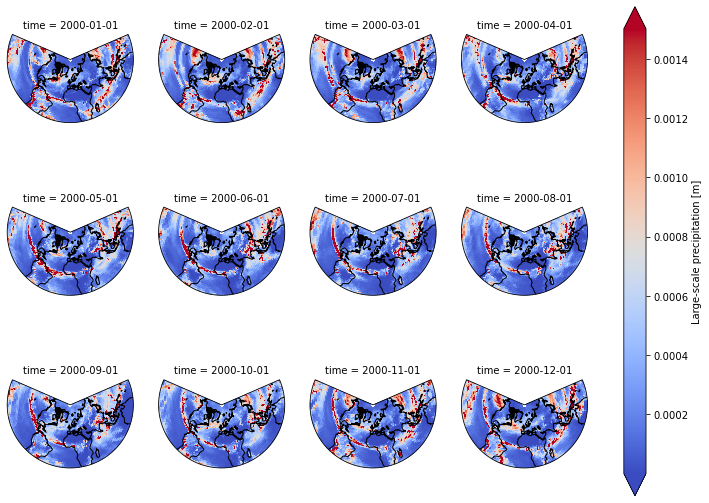

In [36]:
# Faceting with cartopy
fg=q.plot(x="longitude",y="latitude", col="time", col_wrap=4,
subplot_kws={"projection": ccrs.LambertConformal(central_longitude=0, central_latitude=50)},
transform=ccrs.PlateCarree(), cmap = "coolwarm", robust=True)

fg.map(lambda: plt.gca().coastlines())
plt.show()

In [58]:
# Computing with xarray
import numpy as np
t=ds.t

t2=t**2
tlog=np.log(t)
tmax=np.amax(t, axis =1)
tmax

<xarray.DataArray 't' (time: 12, latitude: 73, longitude: 144)>
array([[[250.05125, 250.05125, 250.05125, ..., 250.05125, 250.05125,
         250.05125],
        [251.27245, 251.33305, 251.39142, ..., 251.07939, 251.14449,
         251.2096 ],
        [252.1367 , 252.28935, 252.43303, ..., 251.64958, 251.81345,
         251.97733],
        ...,
        [288.2336 , 288.2381 , 288.24036, ..., 288.23135, 288.23135,
         288.2336 ],
        [287.91934, 287.92157, 287.92383, ..., 287.9126 , 287.91486,
         287.91708],
        [287.83853, 287.83853, 287.83853, ..., 287.83853, 287.83853,
         287.83853]],

       [[253.09975, 253.09975, 253.09975, ..., 253.09975, 253.09975,
         253.09975],
        [254.51173, 254.55664, 254.60378, ..., 254.37032, 254.41745,
         254.4646 ],
        [255.2413 , 255.25702, 255.27274, ..., 255.21661, 255.2211 ,
         255.23009],
...
        [276.8613 , 276.8725 , 276.88824, ..., 276.84332, 276.84558,
         276.8523 ],
        [276.29785, 276.30905, 276.32254, ..., 276.26642, 276.2754 ,
         276.28662],
        [276.3562 , 276.3562 , 276.3562 , ..., 276.3562 , 276.3562 ,
         276.3562 ]],

       [[252.67772, 252.67772, 252.67772, ..., 252.67772, 252.67772,
         252.67772],
        [252.26915, 252.3118 , 252.3567 , ..., 252.17038, 252.19957,
         252.23323],
        [252.19058, 252.27364, 252.37016, ..., 252.03345, 252.07161,
         252.12325],
        ...,
        [287.09998, 287.12915, 287.15833, ..., 287.0214 , 287.04608,
         287.07303],
        [285.76654, 285.7845 , 285.80246, ..., 285.71716, 285.73288,
         285.7486 ],
        [285.69244, 285.69244, 285.69244, ..., 285.69244, 285.69244,
         285.69244]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * latitude   (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * time       (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2000-12-01